## Importing Libraries

In [1]:
from math import ceil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import os

import matplotlib.pyplot as plt

import torch.utils.data as td
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
from collections import defaultdict

import numpy as np
from scipy.signal import savgol_filter
import time
from torchvision import models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import pickle
from thop import profile


import json
from PIL import Image as PilImage

## Setting Path

In [2]:
path = new_path = "C:/Users/vshar/Downloads/Dataset 1/Dataset 1/Colorectal Cancer"
subDirectories = os.listdir(new_path)
saveFilePath="C:/Users/vshar/Documents/hyperparameters_TransferLearning_NLLL.pkl"
saveModelPath="C:/Users/vshar/Documents"

## Set device to GPU

In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Reading the labels of the Dataset

In [4]:
print(subDirectories)

enu = range(len(subDirectories))
labels_map={}
for enu,subDirectory in enumerate(subDirectories):
    labels_map.update({enu:subDirectory})
print(labels_map)
print("The number of labels in the dataset = %s"% len(labels_map))
print("The \'%s\' device is being used to process the dataset"%device)

['MUS', 'NORM', 'STR']
{0: 'MUS', 1: 'NORM', 2: 'STR'}
The number of labels in the dataset = 3
The 'cuda' device is being used to process the dataset


## Display Dataset Images

In [5]:
def displayImages(t_dataset,imageFlag):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    if imageFlag==0:
      figure.suptitle("Images before preprocessing")
    else:
     figure.suptitle("Images after preprocessing")   
    for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(t_dataset), size=(1,)).item()
      img, label = t_dataset[sample_idx]
      img=np.array(img).transpose((1,2,0))
      figure.add_subplot(rows, cols, i)
      plt.title(labels_map[label])
      plt.axis("off")
      plt.imshow(img.squeeze())
    print("\n\n\n################################################\n\n\n")
    plt.show()

## Load Data

In [6]:
def data_loader(data_dir_input,batch_sizeGiven,input_size,flag=0,test_split=0.1,val_split=0.1):
# Define dataset directory and transforms
  data_dir = data_dir_input #
  
  data_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
  ])


  if flag==1:
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),   
  ]))
    displayImages(test_temp_dataset,0)
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=data_transform)
    displayImages(test_temp_dataset,1)

    data = datasets.ImageFolder(root=data_dir, transform=data_transform)
    # Define train, validation, and test dataset
    dataset_size = len(data)
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)
    train_size = dataset_size - (test_size + val_size)
    train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
    print("Train Datset Size After Split",len(train_dataset))
    print("Test Datset Size After Split",len(test_dataset))
    print("Validation Datset Size After Split",len(val_dataset))


    # Create a dictionary to store the number of images per class
    num_images_per_class = defaultdict(int)

    # Iterate over the training dataset and count the number of images in each class
    for image, label in train_dataset:
        num_images_per_class[label] += 1

    # Print the number of images per class
    for label, num_images in num_images_per_class.items():
        print(f"Class {label}: {num_images} images")
  

    # Define the number of classes and generate a list of colors
    num_classes = len(num_images_per_class)
    colors = plt.cm.Set1(np.linspace(0, 1, num_classes))

    # Plot the number of images per class as a bar plot
    plt.bar(num_images_per_class.keys(), num_images_per_class.values(), color=colors)
    #plt.pie(num_images_per_class.values(), labels=num_images_per_class.keys(), colors=colors, autopct='%1.1f%%')
    # Add axis labels and title
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.title("Number of images per class in the dataset")

    # Create a legend
    labels = [f"Class {label}" for label in num_images_per_class.keys()]
    plt.legend([plt.bar(0, 0, color=colors[i])[0] for i in range(len(num_images_per_class))], labels,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.rcParams["figure.figsize"] = (40,15)
    # Show the plot
    plt.show()
    
    return  

  data = datasets.ImageFolder(root=data_dir, transform=data_transform)
  # Define train, validation, and test dataset
  dataset_size = len(data)
  test_size = int(test_split * dataset_size)
  val_size = int(val_split * dataset_size)
  train_size = dataset_size - (test_size + val_size)
  train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
 
  train_loader = DataLoader(train_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) #shuffle 
  val_loader = DataLoader(val_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) # shuffle working


  return train_loader,test_loader,val_loader

## Dataset images before and after Preprocessing




################################################





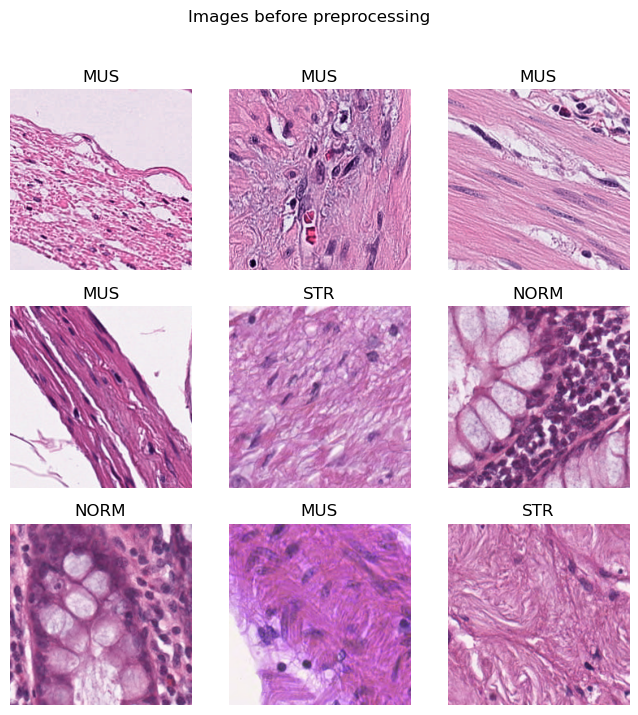

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).





################################################





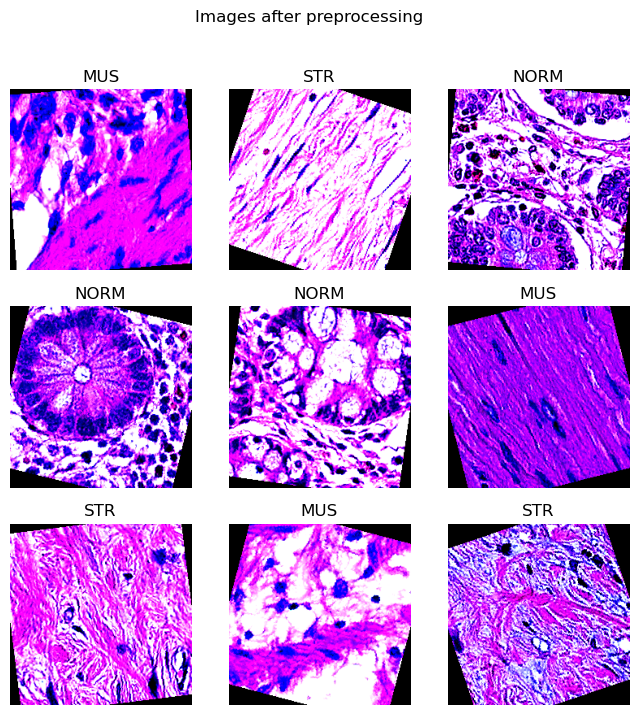

Train Datset Size After Split 4800
Test Datset Size After Split 600
Validation Datset Size After Split 600
Class 1: 1614 images
Class 2: 1621 images
Class 0: 1565 images


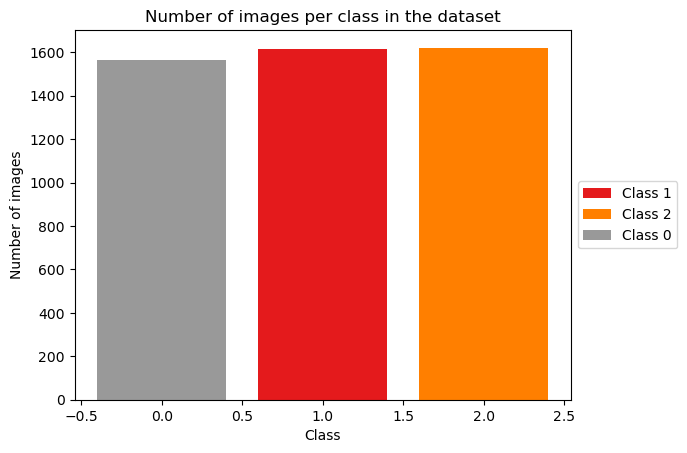

In [7]:
batch_size=32
inputDimension=(224,224)
data_loader(path,batch_size,inputDimension,flag=1)

## Training Loop

In [8]:
def train(num_epochsGiven, model, train_loader, criterion, optimizer,val_loader):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print("Device: {}".format(device))
  model.to(device)
  Accuracy=[]
  validAccuracy=[]
  stepAccuracyTotal=[]
  stepAccuracyValidationTotal=[]
  stepLossTotal=[]
  Loss = []
  num_epochs = num_epochsGiven
  total_steps = len(train_loader)
  t1 = time.time()
  total,correct,loss=0,0,0
  for epoch in range(num_epochs):
      stepAcc=[]
      stepLoss=[]    
      for i, data in enumerate(train_loader):
          images, labels = data[0].to(device), data[1].to(device)
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          # Backprop and optimisation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          # Train accuracy
          total = labels.size(0)
          _,predicted = torch.max(outputs.data, 1)
          correct = (predicted == labels).sum().item()
          stepAcc.append((correct / total) * 100)
          stepLoss.append(loss.item())
          if (i + 1) % 30 == 0:
              stepAccuracyTotal.append((correct / total) * 100)
              stepLossTotal.append(loss.item())
              correct_v = 0
              total_v = 0
              for dataVal in val_loader:
                  images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
                  outputs = model(images_v)
                  _, predicted = torch.max(outputs.data, 1)
                  correct_v += (predicted == labels_v).sum().item()
                  total_v += labels_v.size(0) 
              stepAccuracyValidationTotal.append((correct_v / total_v) * 100)
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%,Validation Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100,(correct_v / total_v) * 100))     
      correct_v = 0
      total_v = 0
      for dataVal in val_loader:
          images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
          outputs = model(images_v)
          _, predicted = torch.max(outputs.data, 1)
          correct_v += (predicted == labels_v).sum().item()
          total_v += labels_v.size(0)        
      Accuracy.append(sum(stepAcc)/len(stepAcc))
      validAccuracy.append((correct_v / total_v) * 100)
      Loss.append(sum(stepLoss)/len(stepLoss))
  endTime =  time.time()
  print("######## Training Finished in {} seconds ###########".format(endTime-t1))
  print("######## Training timer per epoch is {} seconds ###########".format((endTime-t1)/num_epochsGiven))
  return Loss,Accuracy,model,validAccuracy,stepAccuracyTotal,stepAccuracyValidationTotal,stepLossTotal

## Testing the model

In [9]:
def test(model, device, test_loader):
  model.eval() 
  y_truth=[]
  y_predicted=[]
  cm=[]
  G_correct=0
  G_total=0
  
  with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          y_truth+=labels.cpu().numpy().tolist()
          y_predicted+=predicted.cpu().numpy().tolist()
      print('Test Accuracy of the model on the {} test images: {} %'.format(total, (correct / total) * 100))
      cm= confusion_matrix(y_truth,y_predicted)
      G_total=total
      G_correct=correct
  print(classification_report(y_truth,y_predicted))
  return cm,((G_correct / G_total) * 100)

## Hyperparameter Tuning

Learning Rate: 0.0001, Batch Size: 32 , Loss function:  Negative Log-Likelihood , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: -7.9608, Accuracy: 90.62%,Validation Accuracy: 90.83%
Epoch [1/10], Step [60/150], Loss: -12.4404, Accuracy: 100.00%,Validation Accuracy: 91.83%
Epoch [1/10], Step [90/150], Loss: -14.8086, Accuracy: 93.75%,Validation Accuracy: 94.00%
Epoch [1/10], Step [120/150], Loss: -16.2017, Accuracy: 93.75%,Validation Accuracy: 94.00%
Epoch [1/10], Step [150/150], Loss: -19.8644, Accuracy: 100.00%,Validation Accuracy: 96.00%
Epoch [2/10], Step [30/150], Loss: -19.5654, Accuracy: 90.62%,Validation Accuracy: 95.17%
Epoch [2/10], Step [60/150], Loss: -24.4508, Accuracy: 96.88%,Validation Accuracy: 95.33%
Epoch [2/10], Step [90/150], Loss: -24.6763, Accuracy: 90.62%,Validation Accuracy: 96.00%
Epoch [2/10], Step [120/150], Loss: -26.7184, Accuracy: 93.75%,Validation Accuracy: 95.50%
Epoch [2/10], Step [150/150], Loss: -31.8614, Accuracy: 100.00%,

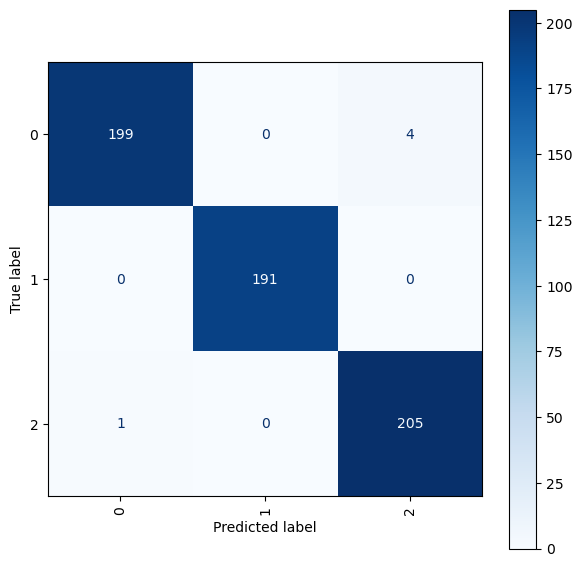

In [10]:
MODELS=[]
hyper_parameters = []
train_acc_hyper_paramaters=[]
train_acc_valid_hyper_paramaters=[]
train_loss_hyper_paramaters=[]

train_acc_hyper_paramaters_step=[]
train_acc_valid_hyper_paramaters_step=[]
train_loss_hyper_paramaters_step=[]
test_loss=[]

#different batch sizes
batch_sizes=[32]
#different learning rates
learning_rates= [0.0001]
#Setting the number of epochs
epochs=10


for learning_rate in learning_rates:
   for batch_size in batch_sizes:
      #Model ResNet   
      model3 = models.resnet18(weights="IMAGENET1K_V1")
      model3.fc = nn.Linear(512,len(labels_map))# fine tuning the last layer
      stringCrit="Negative Log-Likelihood"
      criterion=nn.NLLLoss()
      #Optimizer Function 
      stringOPTM="Adam Optimizer"
      optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

      hyper_parameters.append(["Learning Rate: "+str(learning_rate)," Batch Size: "+str(batch_size),stringCrit,stringOPTM])
      print("Learning Rate: "+str(learning_rate)+", Batch Size: "+str(batch_size),", Loss function: ",stringCrit,", Optimizer: ",stringOPTM)
      
      train_loader, test_loader, val_loader = data_loader(path,batch_size, inputDimension)
      tempLoss,tempAccuracy,tempModel,tempValidAccuracy,tempStepAccuracy,tempStepValidation,tempStepLoss = train(epochs,model3,train_loader,criterion,optimizer,val_loader)

      
      train_loss_hyper_paramaters.append(tempLoss)
      train_acc_hyper_paramaters.append(tempAccuracy)
      train_acc_valid_hyper_paramaters.append(tempValidAccuracy)

      train_acc_valid_hyper_paramaters_step.append(tempStepValidation)      
      train_acc_hyper_paramaters_step.append(tempStepAccuracy)
      train_loss_hyper_paramaters_step.append(tempStepLoss)

      cmReturned,temp_test_loss = test(model3,"cuda",test_loader)
      test_loss.append([temp_test_loss,learning_rate])
      if cmReturned is not None:
          fig, ax = plt.subplots(figsize=(7, 7))
          ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
          plt.show()   
      MODELS.append(tempModel)

## Storing the loss,training accuracy,validation accuracy in a file

In [11]:
# Loading the lists from the file
saveFilePath="C:/Users/vshar/Documents/hyperparameters_TransferLearning_NLLLOSS.pkl"
with open(saveFilePath, 'wb') as f:
    data = {
        'hyper_parameters': hyper_parameters,
        'train_acc_hyper_paramaters': train_acc_hyper_paramaters,
        'train_acc_valid_hyper_paramaters': train_acc_valid_hyper_paramaters,
        'train_loss_hyper_paramaters': train_loss_hyper_paramaters,
        'train_acc_hyper_paramaters_step': train_acc_hyper_paramaters_step,
        'train_acc_valid_hyper_paramaters_step': train_acc_valid_hyper_paramaters_step,
        'train_loss_hyper_paramaters_step': train_loss_hyper_paramaters_step,
        'test_loss': test_loss,
    }
    pickle.dump(data, f)

## Loading the loss,training accuracy,validation accuracy in a file

In [ ]:
# Loading the lists from the file
saveFilePath="C:/Users/vshar/Documents/hyperparameters_TransferLearning_NLLL.pkl"
saveModelPath="C:/Users/vshar/Documents"
with open(saveFilePath, 'rb') as f:
    data = pickle.load(f)
    hyper_parameters = data['hyper_parameters']
    train_acc_hyper_paramaters = data['train_acc_hyper_paramaters']
    train_acc_valid_hyper_paramaters = data['train_acc_valid_hyper_paramaters']
    train_loss_hyper_paramaters = data['train_loss_hyper_paramaters']
    train_acc_hyper_paramaters_step = data['train_acc_hyper_paramaters_step']
    train_acc_valid_hyper_paramaters_step = data['train_acc_valid_hyper_paramaters_step']
    train_loss_hyper_paramaters_step = data['train_loss_hyper_paramaters_step']
    test_loss=data['test_loss']

## Saving the Models

In [12]:
i=1
saveModelPath="C:/Users/vshar/Documents/TASK1"
for i in range(len(MODELS)):
    torch.save(MODELS[i], saveModelPath+"/COMP6321_ResNet_Task1_CancerDataset_Model_Final_TransferLearning_NLLL"+str(i)+".pth")

## Setting the font size and creaing list of epochs

In [13]:
epochs=10  
"""Creating a list of epochs used for generating the plots""" 
num_epochs = [(i+1) for i in range(epochs)]
plt.rcParams.update({'font.size': 15})

## Accuracy Plots(without smoothening)

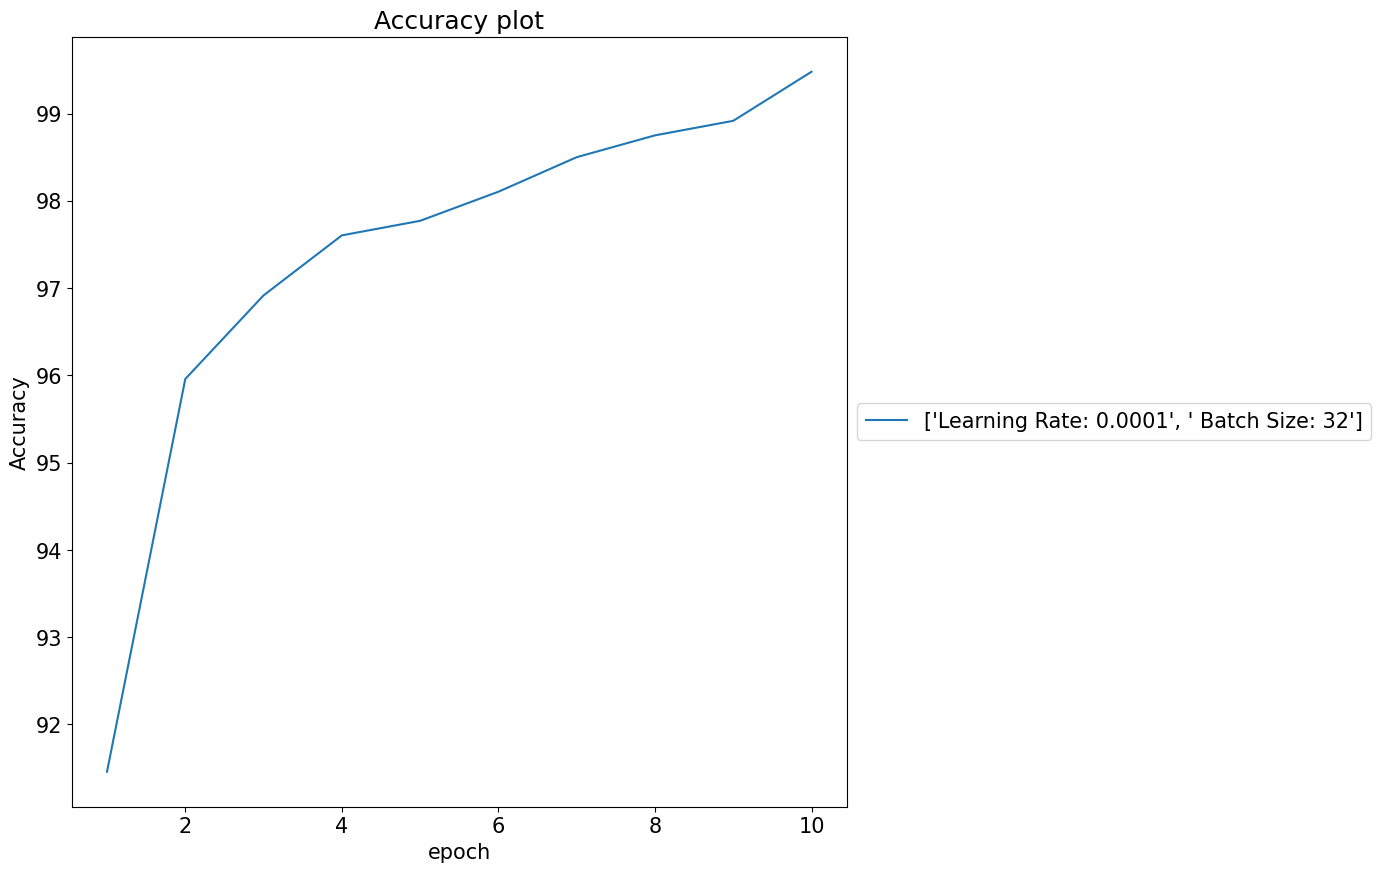

In [14]:
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

for i in range(len(hyper_parameters)):
    plt.plot(num_epochs,train_acc_hyper_paramaters[i],label=hyper_parameters[i][0:2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Accuracy Plots(without smoothening)

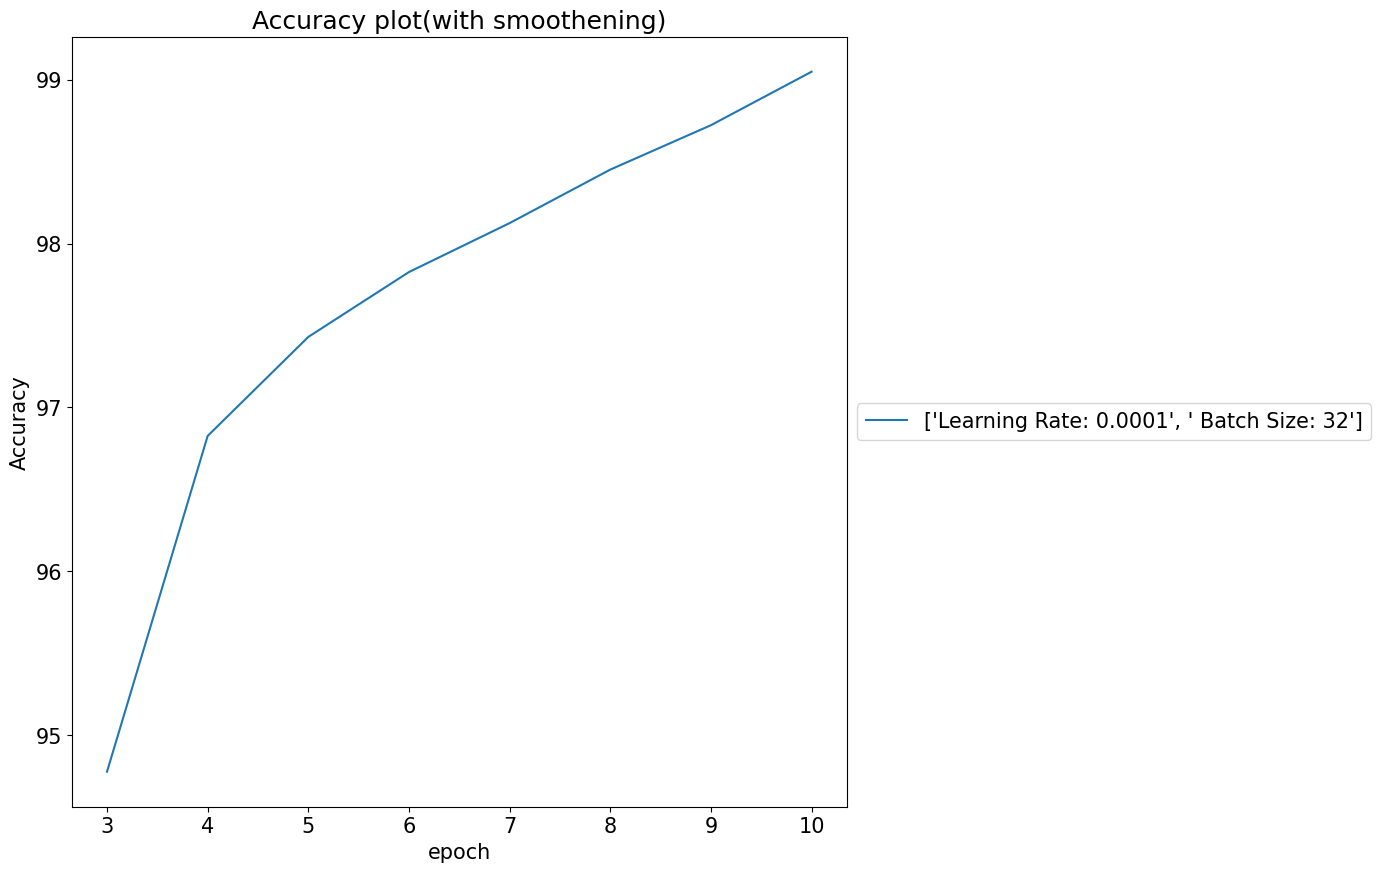

In [15]:
epochs = 10
num_epochs = [(i+1) for i in range(epochs)]
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot(with smoothening)')

window_size = 3  # choose the window size for smoothing

for i in range(len(hyper_parameters)):
    accuracy = train_acc_hyper_paramaters[i]
    smoothed_accuracy = np.convolve(accuracy, np.ones(window_size)/window_size, mode='valid')
    plt.plot(num_epochs[-len(smoothed_accuracy):], smoothed_accuracy, label=hyper_parameters[i][0:2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Test Accuracy and Learning Rate(Scatter plot)

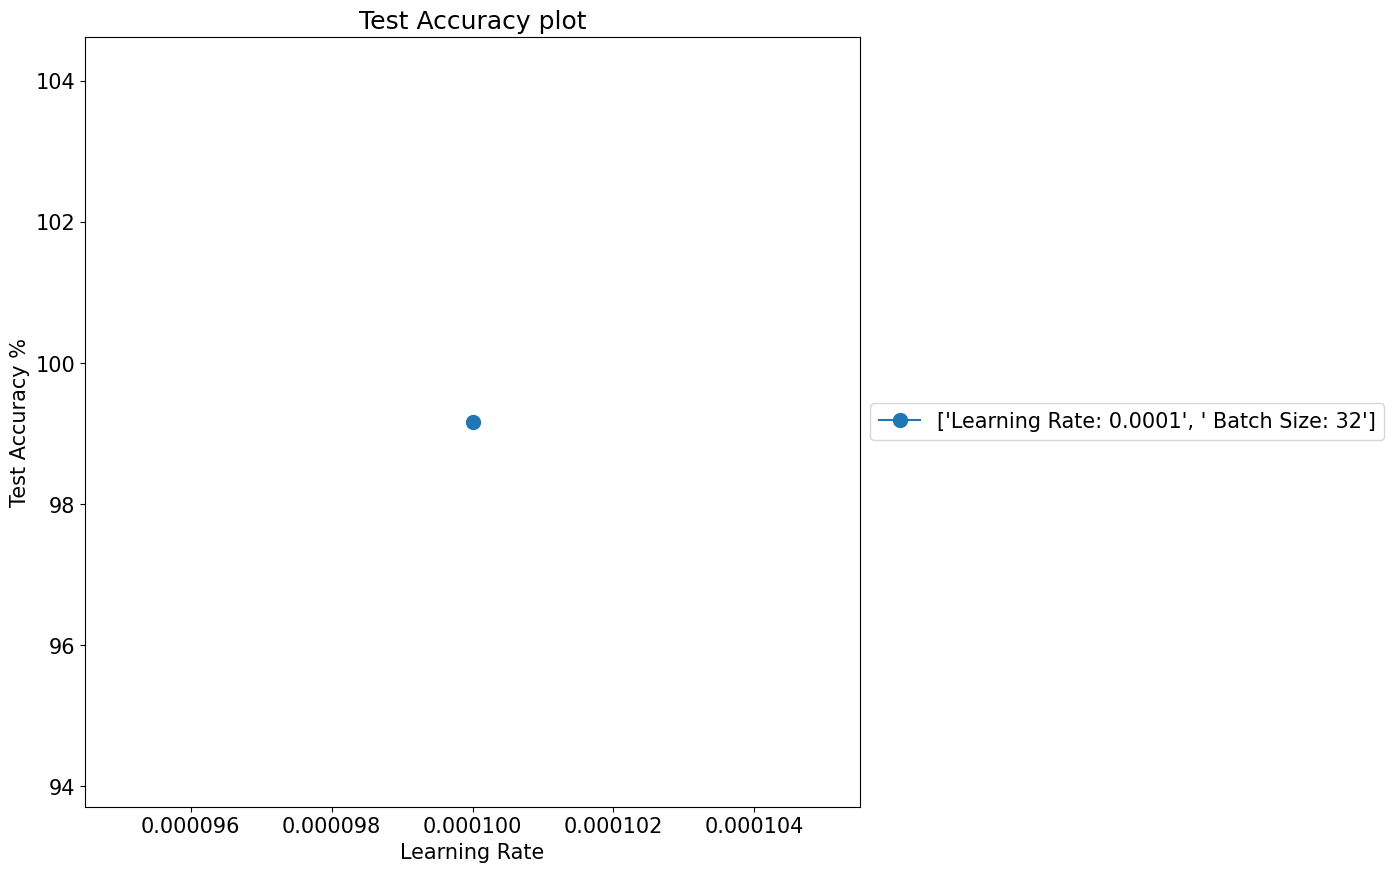

In [16]:
plt.figure(figsize=(10, 10))
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy %')
plt.title('Test Accuracy plot')


for i in range(len(hyper_parameters)):
    #print(test_loss[i][0],test_loss[i][1])
    plt.plot(test_loss[i][1],test_loss[i][0], marker='o', markersize=10,label=hyper_parameters[i][0:2])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Loss Plot(without smoothening)

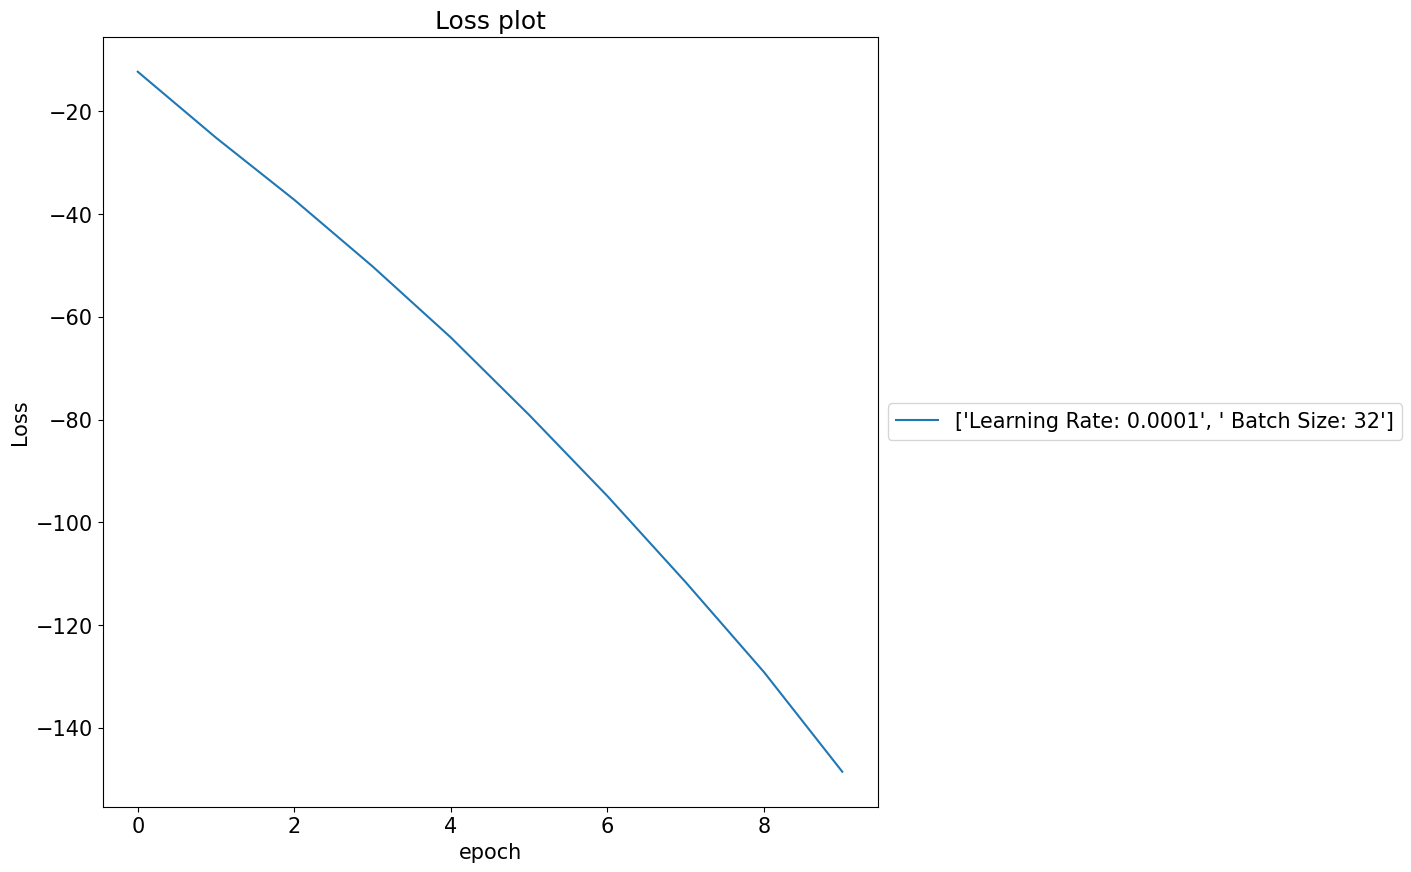

In [17]:
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')
#plt.ylim(0,3)
print()

for i in range(len(hyper_parameters)):
    #print(train_loss_hyper_paramaters[i])
    plt.plot(train_loss_hyper_paramaters[i],label=hyper_parameters[i][0:2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Loss Plot(with smoothening)

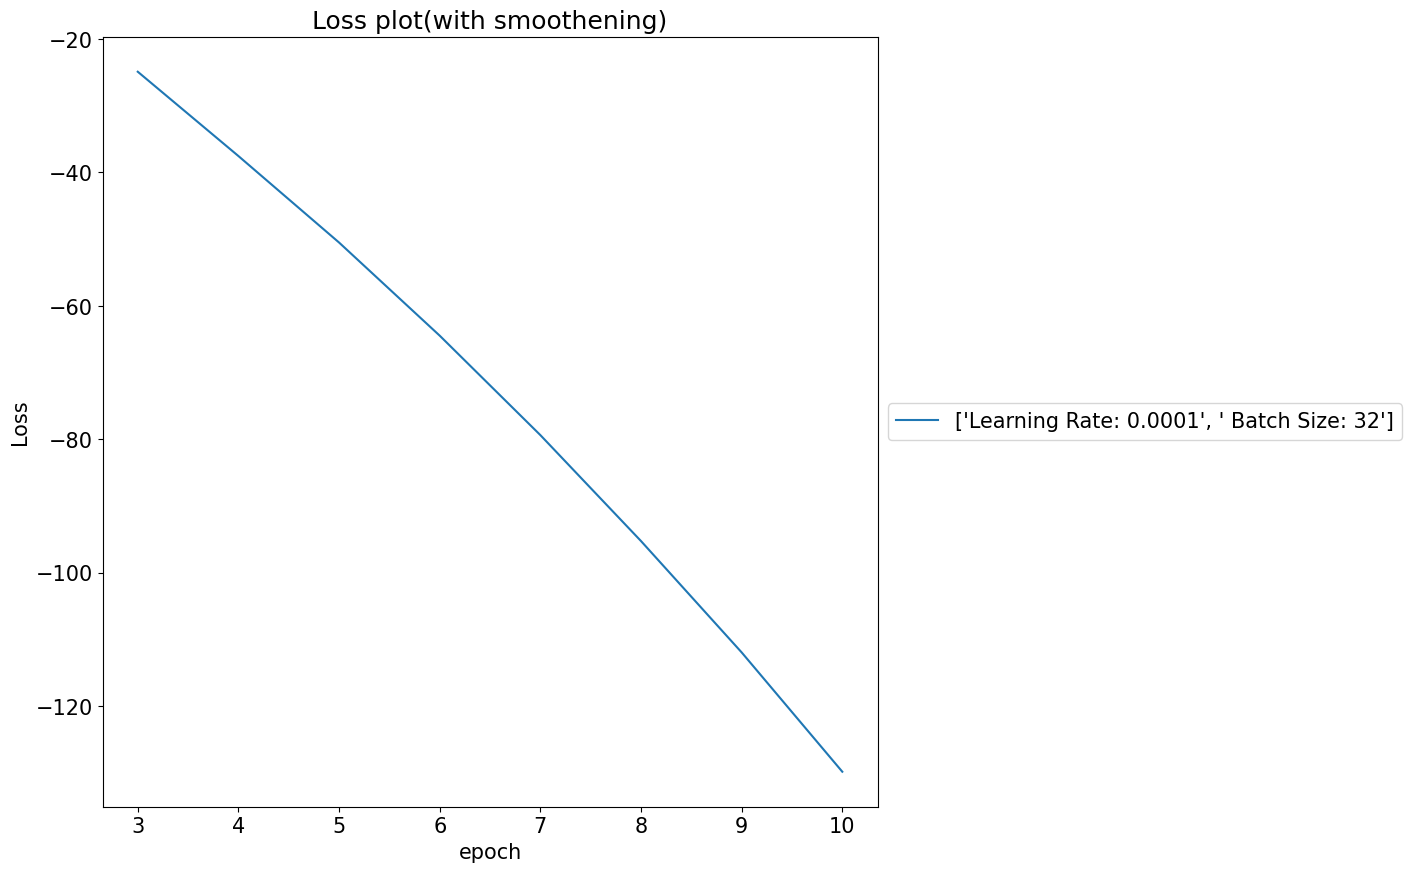

In [18]:
epochs = 10
num_epochs = [(i+1) for i in range(epochs)]
plt.figure(figsize=(10, 10))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot(with smoothening)')
#plt.ylim(0,3)
window_size = 3  # choose the window size for smoothing

for i in range(len(hyper_parameters)):
    losses = train_loss_hyper_paramaters[i]
    smoothed_losses = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')
    plt.plot(num_epochs[-len(smoothed_losses):], smoothed_losses, label=hyper_parameters[i][0:2])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Loss Plot with respect to steps(without smoothening)

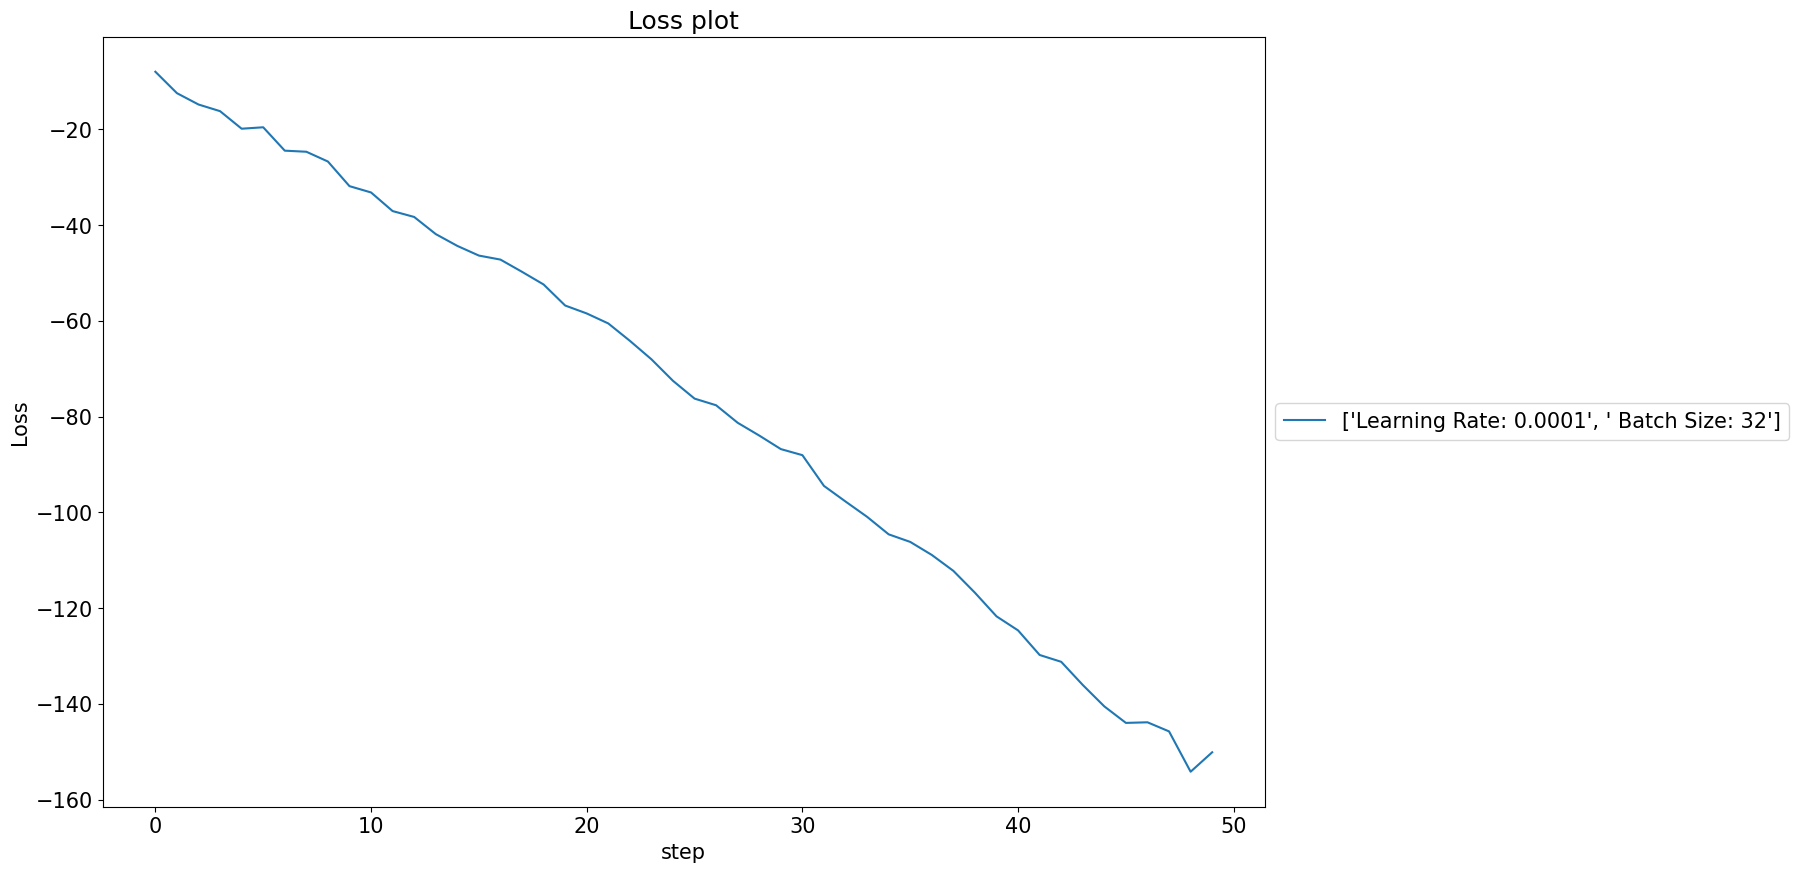

In [19]:
plt.figure(figsize=(15, 10))
plt.xlabel('step')
plt.ylabel('Loss')
plt.title('Loss plot')
#plt.ylim(0,3)

for i in range(len(hyper_parameters)):
    plt.plot(train_loss_hyper_paramaters_step[i],label=hyper_parameters[i][0:2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Loss Plot with respect to steps(with smoothening)

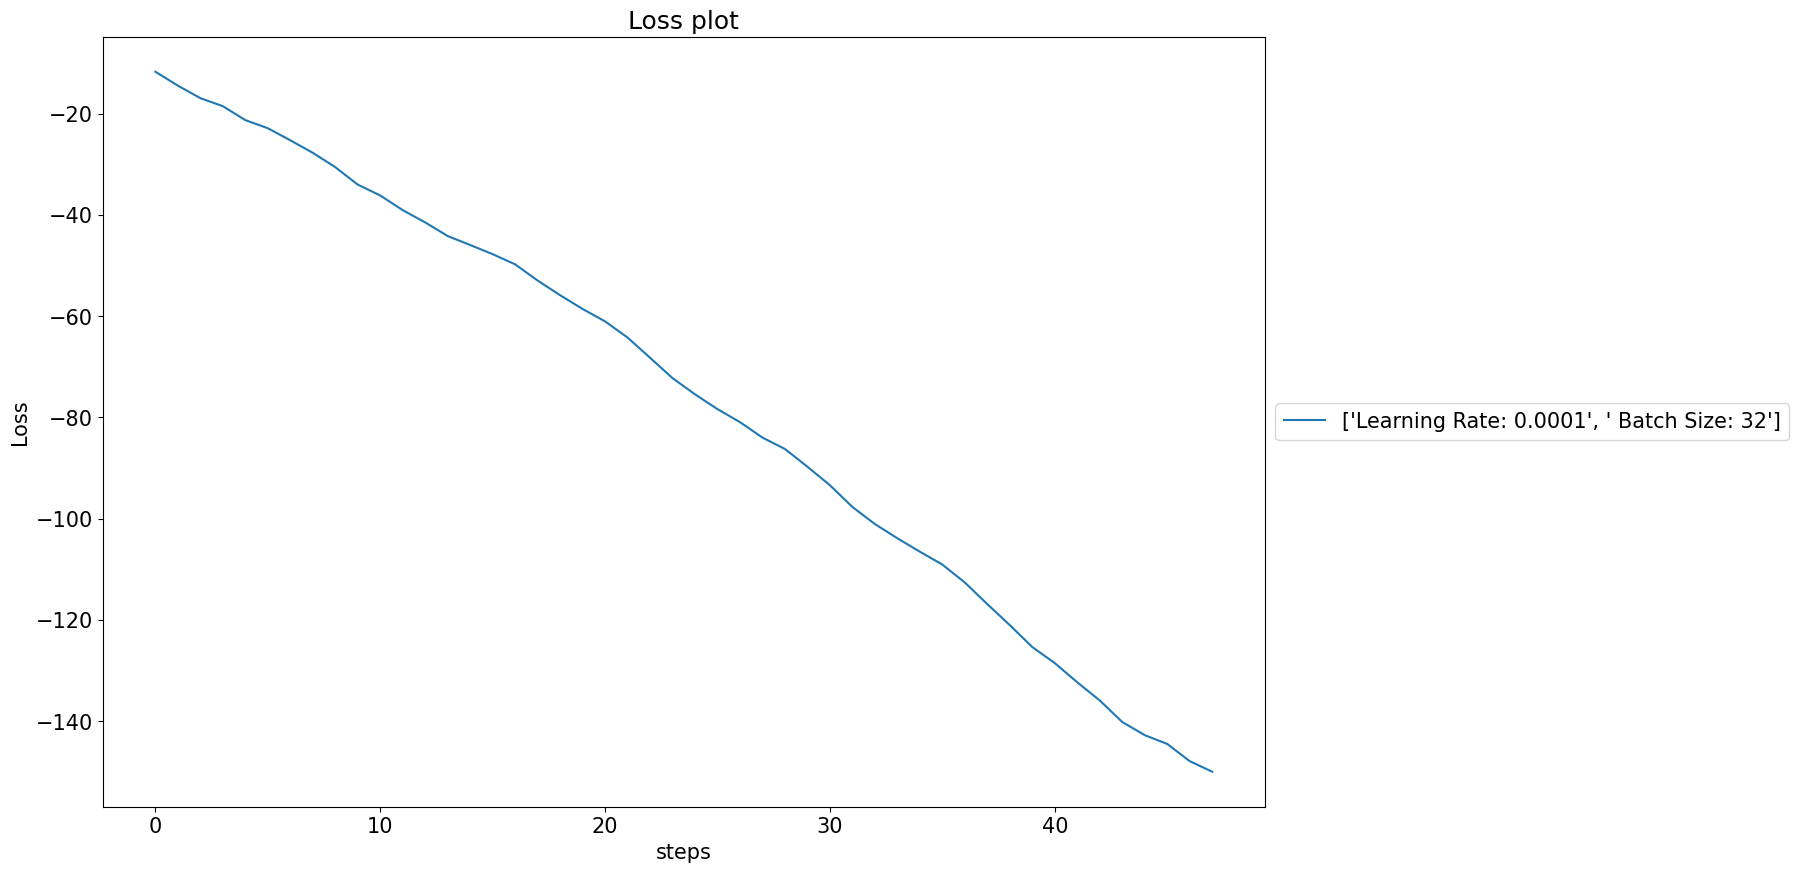

In [20]:
plt.figure(figsize=(15, 10))
plt.xlabel('steps')
plt.ylabel('Loss')
plt.title('Loss plot')
#plt.ylim(0,3)
window_size = 3

for i in range(len(hyper_parameters)):
    # apply moving average filter to loss values
    smoothed_loss = np.convolve(train_loss_hyper_paramaters_step[i], np.ones(window_size)/window_size, mode='valid')
    plt.plot(smoothed_loss, label=hyper_parameters[i][0:2])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



## Training and Validation Plots with respect to steps(without smoothing)

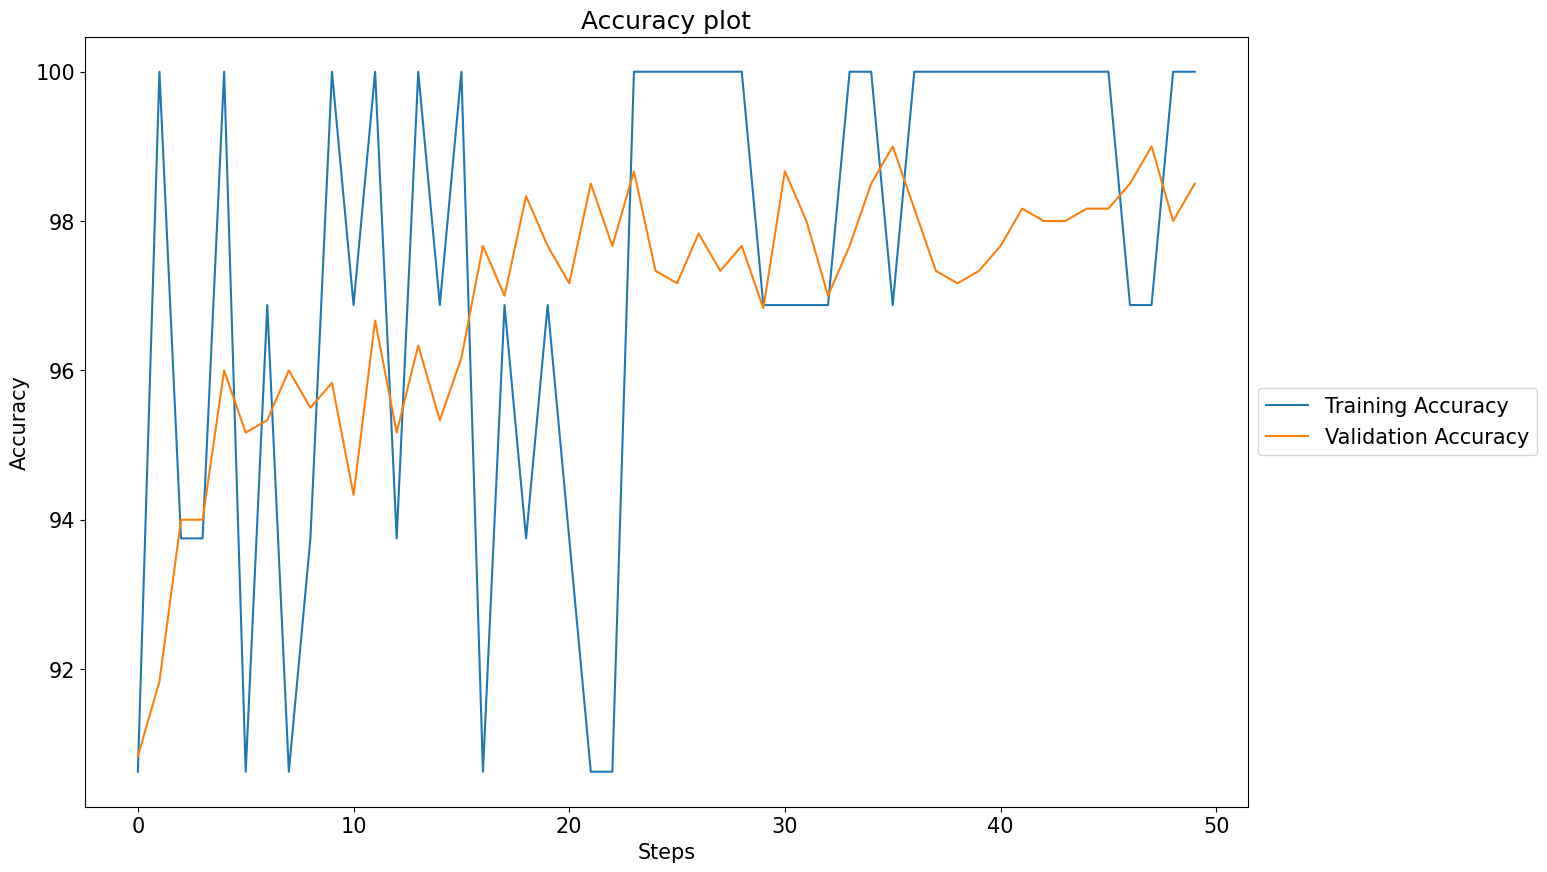

In [21]:
plt.figure(figsize=(15, 10))
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

for i in range(len(hyper_parameters)):
    plt.plot(train_acc_hyper_paramaters_step[i],label="Training Accuracy")
    plt.plot(train_acc_valid_hyper_paramaters_step[i],label="Validation Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## T-SNE Plot (Learning Rate=0.0001 and Batch size=32)

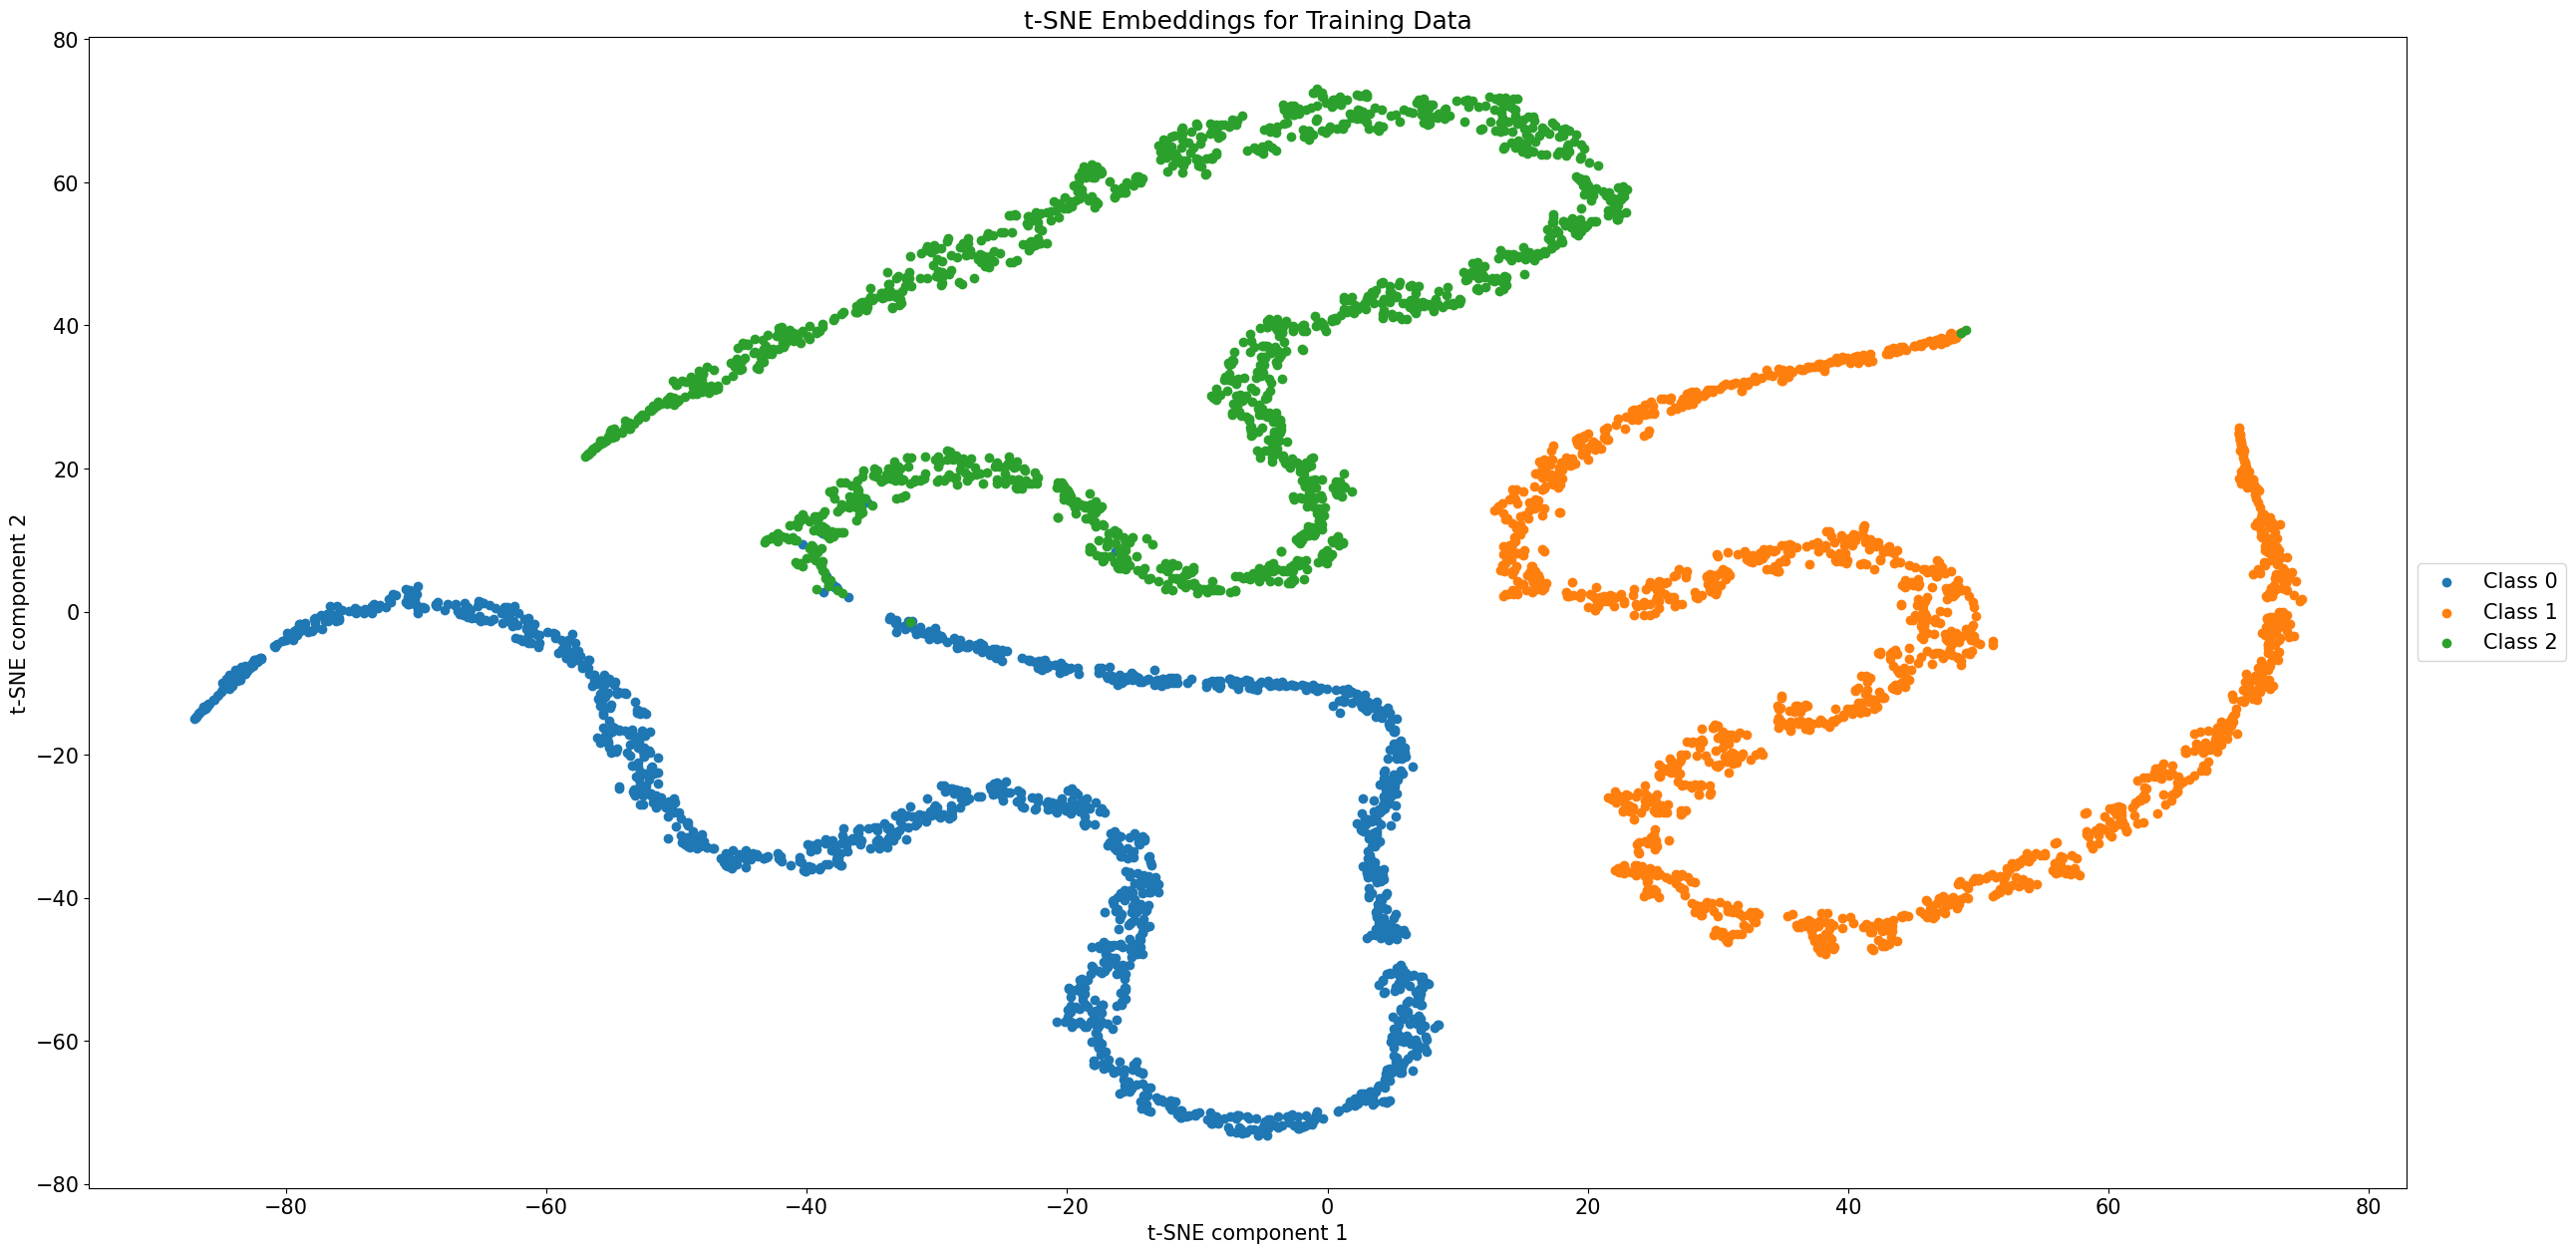

In [22]:
temporaryModel=MODELS[0]
# Get embeddings for the training data
embeddings = []
labels = []
with torch.no_grad():
    for data in train_loader:
        images, targets = data[0].to(device), data[1].to(device)
        outputs = temporaryModel(images)
        embeddings.append(outputs.cpu().numpy())
        labels.append(targets.cpu().numpy())
embeddings = np.concatenate(embeddings)
labels = np.concatenate(labels)

  # Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
embeddings_tsne = tsne.fit_transform(embeddings)

  # Plot t-SNE embeddings
plt.figure(figsize=(30,15))


for i in range(len(labels_map)):
    plt.scatter(embeddings_tsne[labels==i,0], embeddings_tsne[labels==i,1], label=f'Class {i}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('t-SNE Embeddings for Training Data')
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

## Model FLOPS

In [23]:
TempTransformer = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
  ])

imageInput = Image.open('C:/Users/vshar/Downloads/Dataset 1/Dataset 1/Colorectal Cancer/NORM/NORM-ADQNLKLS.tif')
input_data = TempTransformer(imageInput)

input_data=input_data.view(1,3,224,224)
print(input_data.size())
r18net = models.resnet18()
flops, params = profile(r18net, inputs=(input_data, ))
print(f"FLOPS: {flops / 1e9:.2f} billion")



torch.Size([1, 3, 224, 224])
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPS: 1.82 billion
